In [11]:
#import libraries
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

# Data preparation and loading

In [12]:
#training and test data

training_data = torchvision.datasets.FashionMNIST( root="data",
                                                  train = True,
                                                  download=True,
                                                  transform=ToTensor(),
                                                  target_transform= None
)

test_data = torchvision.datasets.FashionMNIST(root="data",
                                 train = False,
                                 download=True,
                                 transform = ToTensor(),
                                 
)

In [16]:
#view the returned data, we know data type is tuple
#returns image, index

image, label = training_data[5]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
           0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
           0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
           0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
           0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
           0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
           0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
           0.6627, 0.6824, 0.6863, 0.6863, 

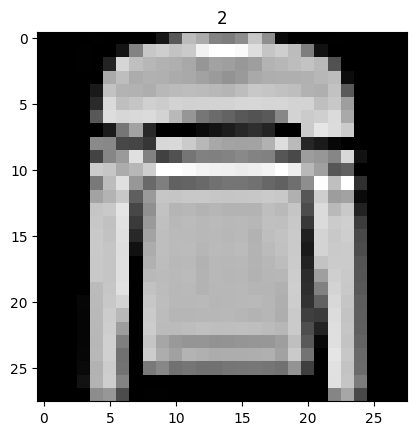

In [19]:
plt.plot(figsize=(6,7))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"{label}")
plt.show()

In [20]:
len(training_data), len(test_data)

(60000, 10000)

In [22]:
image.shape


torch.Size([1, 28, 28])